In [29]:
# Import necessary libraries below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('bom.movie_gross.csv.gz')
df.head(5)
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [30]:
df[["domestic_gross", "foreign_gross"]] = df[["domestic_gross", "foreign_gross"]].apply(pd.to_numeric, errors='coerce')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2032 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 132.3+ KB


In [31]:
df['foreign_gross'].fillna(value=df['foreign_gross'].mean())

0       6.520000e+08
1       6.913000e+08
2       6.643000e+08
3       5.357000e+08
4       5.139000e+08
            ...     
3382    7.505704e+07
3383    7.505704e+07
3384    7.505704e+07
3385    7.505704e+07
3386    7.505704e+07
Name: foreign_gross, Length: 3387, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2032 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 292.3+ KB


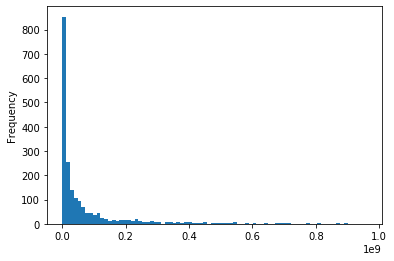

In [32]:
df['foreign_gross'].plot(kind='hist', bins=80)

In [10]:
df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [33]:
mean_foreign_gross= df['foreign_gross'].mean()
df['foreign_gross'].fillna(mean_foreign_gross, inplace= True)
#df['foreign_gross']=df['foreign_gross'].fillna(value=df['foreign_gross'].mean())

In [29]:
df.isna().sum()

studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

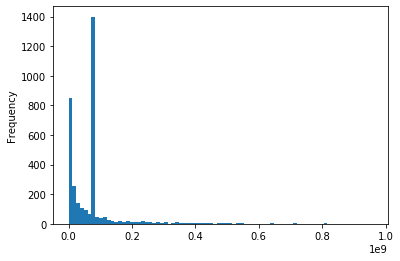

In [34]:
df['foreign_gross'].plot(kind='hist', bins=80)

In [35]:
df=df.dropna()

In [32]:
df.isna().sum()

studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3356 non-null   object 
 1   domestic_gross  3356 non-null   float64
 2   foreign_gross   3356 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 131.1+ KB


In [36]:
df1=pd.read_csv('imdb.title.basics.csv.gz')

df1.head()
df1.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [59]:
df1.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [60]:
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [37]:
mean_runtime_minutes= df1['runtime_minutes'].mean()
df1['runtime_minutes'].fillna(mean_runtime_minutes, inplace= True)

In [38]:
df1=df1.dropna()

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [53]:
df1.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [39]:
df1.drop_duplicates(subset='tconst', inplace=True)
df1.reset_index(drop=True, inplace=True)

In [74]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140734 entries, 0 to 140733
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.4+ MB


In [40]:
df1.tconst.unique()

array(['tt0063540', 'tt0066787', 'tt0069049', ..., 'tt9916622',
       'tt9916706', 'tt9916754'], dtype=object)

In [41]:
df2=pd.read_csv('imdb.title.ratings.csv.gz')


df2.head()
df2.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [65]:
df2.head(6)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326


In [66]:
df2.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [42]:
df2.drop_duplicates(subset='tconst', inplace=True)

In [43]:
df2.reset_index(drop=True, inplace=True)

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [44]:
df3 = df1.set_index('tconst').join(df2.set_index('tconst'), how='inner')

In [22]:
df3.head(200)
        

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt0496375,Prisoners of the Sun,Prisoners of the Sun,2013,85.000000,"Action,Adventure,Horror",3.7,1106
tt0498351,The Hero of Color City,The Hero of Color City,2014,77.000000,"Animation,Family",4.0,431
tt0498381,Rings,Rings,2017,102.000000,"Drama,Horror,Mystery",4.5,34151


In [45]:
df3.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [46]:
df3.rename(columns={'primary_title': 'title'}, inplace= True)

In [47]:
df3.columns

Index(['title', 'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [48]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [50]:
df4 = df3.set_index('title').join(df.set_index('title'), how='inner')
df4.head()

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
title,,,,,,,,,,
'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,3.550000e+05,2015
"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,7.505704e+07,2014
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,3.810000e+07,2016
10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,7.505704e+07,2012
1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,7.505704e+07,2015


In [51]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, '71 to Zootopia
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   2997 non-null   object 
 1   start_year       2997 non-null   int64  
 2   runtime_minutes  2997 non-null   float64
 3   genres           2997 non-null   object 
 4   averagerating    2997 non-null   float64
 5   numvotes         2997 non-null   int64  
 6   studio           2997 non-null   object 
 7   domestic_gross   2997 non-null   float64
 8   foreign_gross    2997 non-null   float64
 9   year             2997 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 257.6+ KB


In [52]:
df4.isna().sum()

original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [128]:
for col in ['genres','studio']:
    print('Values for {}:\n{}\n\n'.format(col, df4[col].unique()))

Values for genres:
['Action,Drama,Thriller' 'Drama,War' 'Drama,Horror,Mystery'
 'Comedy,Drama,Romance' 'Drama' 'Comedy,Drama' 'Horror,Mystery,Thriller'
 'Action,Drama,History' 'Biography,Drama,History'
 'Adventure,Biography,Drama' 'Action,Adventure,Drama' 'Horror,Thriller'
 'Comedy' 'Action,Comedy,Crime' 'Documentary,Music'
 'Documentary,Drama,Music' 'Drama,Romance' 'Thriller' 'Drama,Thriller'
 'Adventure,Drama,Horror' 'Action,Drama,War' 'Documentary'
 'Adventure,Crime,Drama' 'Adventure,Comedy' 'Crime,Drama'
 'Drama,Fantasy,Horror' 'Biography,Drama,Romance' 'Adventure,Comedy,Drama'
 'Action,Comedy' 'Drama,Fantasy,Romance' 'Drama,Horror' 'Action,Thriller'
 'Comedy,Romance' 'Comedy,Fantasy' 'Drama,Music'
 'Adventure,Animation,Comedy' 'Comedy,Drama,Fantasy' 'Comedy,Western'
 'Animation,Drama,Fantasy' 'Crime,Drama,Thriller' 'Comedy,Drama,War'
 'Biography,Drama,War' 'Biography,Drama' 'Drama,Horror,Sci-Fi'
 'Documentary,Drama,Family' 'Animation,Drama,Romance' 'Comedy,Crime,Drama'
 'Biography

In [54]:
x=df4.genres.value_counts(normalize=True)

Drama                          0.105439
Comedy,Drama                   0.044378
Comedy,Drama,Romance           0.044044
Drama,Romance                  0.037371
Documentary                    0.036036
                                 ...   
Adventure,Documentary,Sport    0.000334
Action,Fantasy,Romance         0.000334
Animation,Comedy,Music         0.000334
Comedy,Mystery,Sci-Fi          0.000334
Comedy,Mystery,Thriller        0.000334
Name: genres, Length: 319, dtype: float64

In [70]:
df4.genres.nunique()

319

In [167]:
Documentary_df = df4[df4['genres'] == 'Documentary']
Drama_df = df4[df4['genres'] == 'Drama']
#Sport_df = df4[df4['genres'] == 'Sport']
Action_df = df4[df4['genres'] == 'Action'] 
Animation_df = df4[df4['genres'] == 'Animation']
Romance_df = df4[df4['genres'] == 'Romance']
#Adventure_df = df4[df4['genres'] == 'Adventure']
#Fantasy_df = df4[df4['genres'] == 'Fantasy']
#Music_df = df4[df4['genres'] == 'Music']
Crime_df = df4[df4['genres'] == 'Crime']
Comedy_df = df4[df4['genres'] == 'Comedy']
#History_df = df4[df4['genres'] == 'History']
#Family_df = df4[df4['genres'] == 'Family']
#Musical_df = df4[df4['genres'] == 'Musical']
#Sci-Fi_df = df4[df4['genres'] == 'Sci-Fi']
Horror_df = df4[df4['genres'] == 'Horror']
#Mystery_df = df4[df4['genres'] == 'Mystery']
Thriller_df = df4[df4['genres'] == 'Thriller']

In [185]:
Documentary_df.head(100)
Documentary_df.original_title.nunique()

107

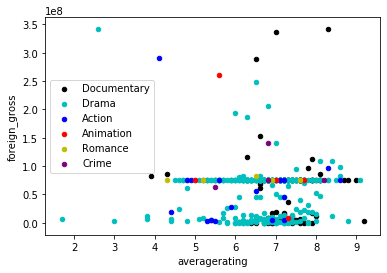

In [201]:
ax = Documentary_df.plot.scatter(x='averagerating', y='foreign_gross', c='k', label='Documentary')
Drama_df.plot.scatter(x='averagerating', y='foreign_gross', c='c', label='Drama', ax=ax)
Action_df.plot.scatter(x='averagerating', y='foreign_gross', c='b', label='Action', ax=ax)
Animation_df.plot.scatter(x='averagerating', y='foreign_gross', c='r', label='Animation', ax=ax)
Romance_df.plot.scatter(x='averagerating', y='foreign_gross', c='y', label='Romance', ax=ax)
Crime_df.plot.scatter(x='averagerating', y='foreign_gross', c='purple', label='Crime', ax=ax)

In [69]:
grouped_df4=df4.groupby('genres').sum()

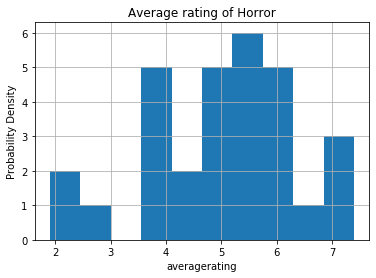

Mean average rating: 5.03
Median average rating: 5.15


In [143]:
show_distplot(Horror_df, 'Horror',  'averagerating')
print('Mean average rating: {}'.format(Horror_df.averagerating.mean()))
print('Median average rating: {}'.format(Horror_df.averagerating.median()))

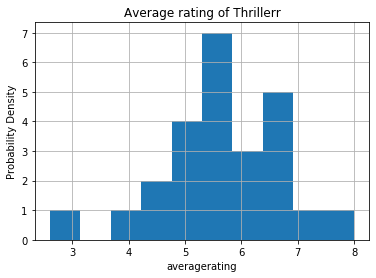

Mean average rating: 5.672
Median average rating: 5.7


In [144]:
show_distplot(Thriller_df, 'Thrillerr',  'averagerating')
print('Mean average rating: {}'.format(Thriller_df.averagerating.mean()))
print('Median average rating: {}'.format(Thriller_df.averagerating.median()))

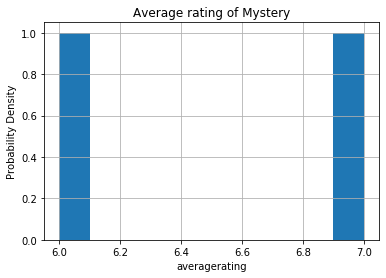

Mean average rating: 6.5
Median average rating: 6.5


In [146]:
show_distplot(Mystery_df, 'Mystery',  'averagerating')
print('Mean average rating: {}'.format(Mystery_df.averagerating.mean()))
print('Median average rating: {}'.format(Mystery_df.averagerating.median()))

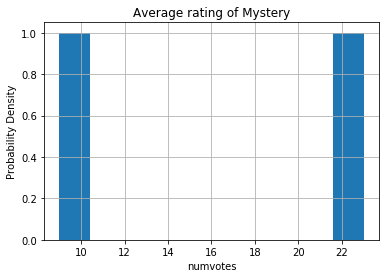

Mean average rating: 16.0
Median average rating: 16.0


In [147]:
show_distplot(Mystery_df, 'Mystery',  'numvotes')
print('Mean average rating: {}'.format(Mystery_df.numvotes.mean()))
print('Median average rating: {}'.format(Mystery_df.numvotes.median()))

In [92]:
def show_distplot(dataframe, type, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Average rating of {}'.format(type))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()
    


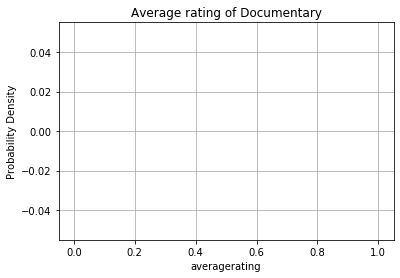

Mean average rating: nan
Median average rating: nan


In [133]:
show_distplot(Documentary_df, 'Documentary',  'averagerating')
print('Mean average rating: {}'.format(Documentary_df.averagerating.mean()))
print('Median average rating: {}'.format(Documentary_df.averagerating.median()))


In [163]:
# Subplot for Documentary
z=Documentary_df.groupby('year')['foreign_gross'].count()
#df['foreign_gross'].plot(kind='hist', bins=80)
#z.plot(kind='hist', bins =80)
print(z)

year
2010    11
2011    14
2012    14
2013     9
2014    10
2015    17
2016    12
2017    17
2018     4
Name: foreign_gross, dtype: int64


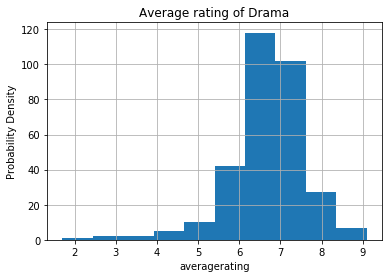

Mean average rating: 6.678481012658225
Median average rating: 6.8


In [134]:
show_distplot(Drama_df, 'Drama',  'averagerating')
print('Mean average rating: {}'.format(Drama_df.averagerating.mean()))
print('Median average rating: {}'.format(Drama_df.averagerating.median()))

In [ ]:
show_distplot(Drama_df, 'Drama',  'averagerating')
print('Mean average rating: {}'.format(Drama_df.averagerating.mean()))
print('Median average rating: {}'.format(Drama_df.averagerating.median()))

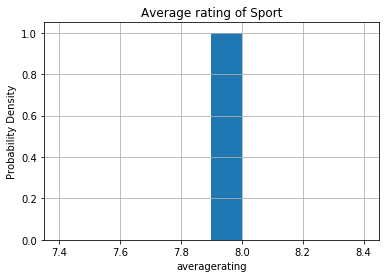

Mean average rating: 7.9
Median average rating: 7.9


In [97]:
show_distplot(Sport_df, 'Sport', 'averagerating')
print('Mean average rating: {}'.format(Sport_df.averagerating.mean()))
print('Median average rating: {}'.format(Sport_df.averagerating.median()))

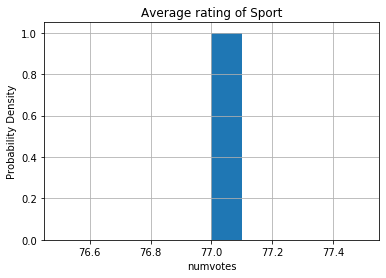

Mean average rating: 77.0
Median average rating: 77.0


In [127]:
show_distplot(Sport_df, 'Sport', 'numvotes')
print('Mean average rating: {}'.format(Sport_df.numvotes.mean()))
print('Median average rating: {}'.format(Sport_df.numvotes.median()))

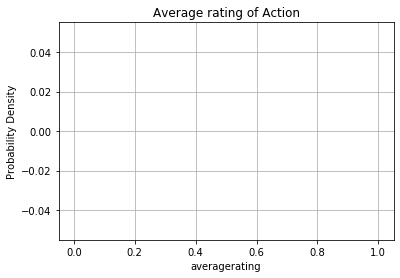

Mean average rating: nan
Median average rating: nan


In [135]:
show_distplot(Action_df, 'Action', 'averagerating')
print('Mean average rating: {}'.format(Action_df.averagerating.mean()))
print('Median average rating: {}'.format(Action_df.averagerating.median()))

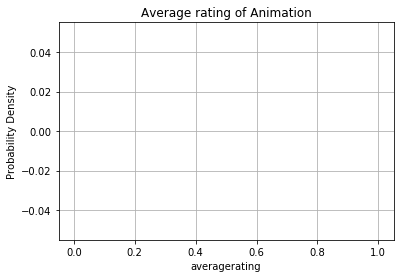

Mean average rating: nan
Median average rating: nan


In [136]:
show_distplot(Animation_df, 'Animation', 'averagerating')
print('Mean average rating: {}'.format(Animation_df.averagerating.mean()))
print('Median average rating: {}'.format(Animation_df.averagerating.median()))

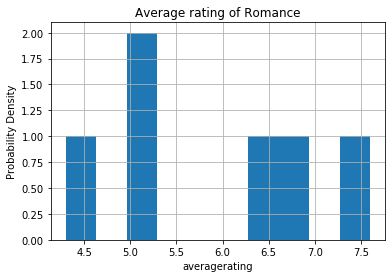

Mean average rating: 5.95
Median average rating: 5.85


In [100]:
show_distplot(Romance_df, 'Romance', 'averagerating')
print('Mean average rating: {}'.format(Romance_df.averagerating.mean()))
print('Median average rating: {}'.format(Romance_df.averagerating.median()))

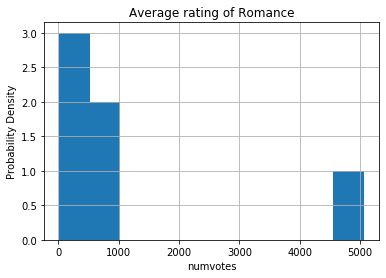

Mean average rating: 1176.6666666666667
Median average rating: 431.0


In [105]:
show_distplot(Romance_df, 'Romance', 'numvotes')
print('Mean average rating: {}'.format(Romance_df.numvotes.mean()))
print('Median average rating: {}'.format(Romance_df.numvotes.median()))

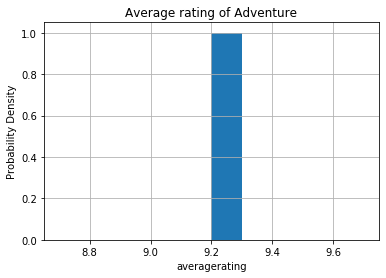

Mean average rating: 9.2
Median average rating: 9.2


In [101]:
show_distplot(Adventure_df, 'Adventure', 'averagerating')
print('Mean average rating: {}'.format(Adventure_df.averagerating.mean()))
print('Median average rating: {}'.format(Adventure_df.averagerating.median()))

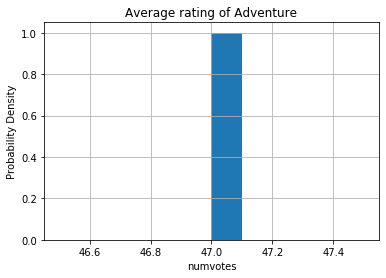

Mean average rating: 47.0
Median average rating: 47.0


In [103]:
show_distplot(Adventure_df, 'Adventure', 'numvotes')
print('Mean average rating: {}'.format(Adventure_df.numvotes.mean()))
print('Median average rating: {}'.format(Adventure_df.numvotes.median()))

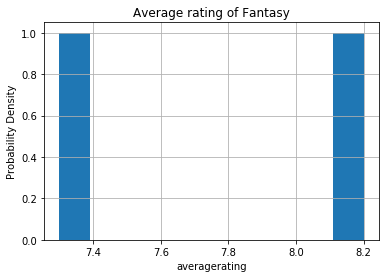

Mean average rating: 7.75
Median average rating: 7.75


In [107]:
show_distplot(Fantasy_df, 'Fantasy', 'averagerating')
print('Mean average rating: {}'.format(Fantasy_df.averagerating.mean()))
print('Median average rating: {}'.format(Fantasy_df.averagerating.median()))

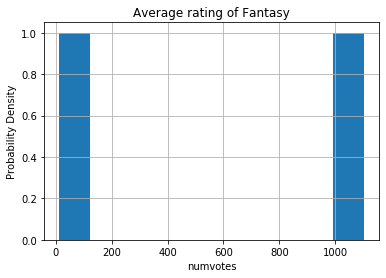

Mean average rating: 557.0
Median average rating: 557.0


In [108]:
show_distplot(Fantasy_df, 'Fantasy', 'numvotes')
print('Mean average rating: {}'.format(Fantasy_df.numvotes.mean()))
print('Median average rating: {}'.format(Fantasy_df.numvotes.median()))

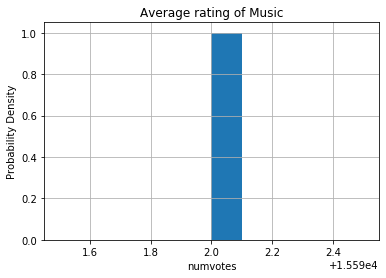

Mean average rating: 15592.0
Median average rating: 15592.0


In [109]:
show_distplot(Music_df, 'Music', 'numvotes')
print('Mean average rating: {}'.format(Music_df.numvotes.mean()))
print('Median average rating: {}'.format(Music_df.numvotes.median()))

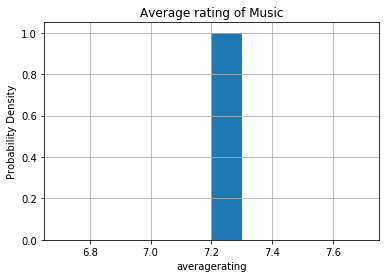

Mean average rating: 7.2
Median average rating: 7.2


In [110]:
show_distplot(Music_df, 'Music', 'averagerating')
print('Mean average rating: {}'.format(Music_df.averagerating.mean()))
print('Median average rating: {}'.format(Music_df.averagerating.median()))

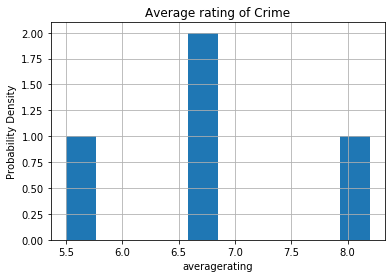

Mean average rating: 6.825
Median average rating: 6.8


In [111]:
show_distplot(Crime_df, 'Crime', 'averagerating')
print('Mean average rating: {}'.format(Crime_df.averagerating.mean()))
print('Median average rating: {}'.format(Crime_df.averagerating.median()))

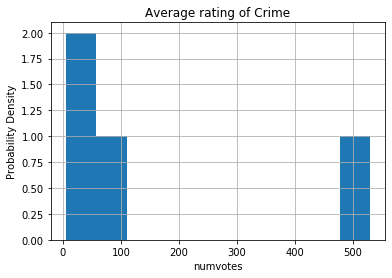

Mean average rating: 161.75
Median average rating: 56.0


In [112]:
show_distplot(Crime_df, 'Crime', 'numvotes')
print('Mean average rating: {}'.format(Crime_df.numvotes.mean()))
print('Median average rating: {}'.format(Crime_df.numvotes.median()))

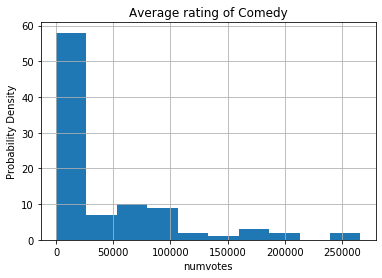

Mean average rating: 41247.64893617021
Median average rating: 8909.5


In [113]:
show_distplot(Comedy_df, 'Comedy', 'numvotes')
print('Mean average rating: {}'.format(Comedy_df.numvotes.mean()))
print('Median average rating: {}'.format(Comedy_df.numvotes.median()))

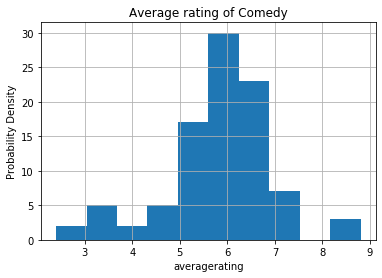

Mean average rating: 5.827659574468084
Median average rating: 6.0


In [115]:
show_distplot(Comedy_df, 'Comedy', 'averagerating')
print('Mean average rating: {}'.format(Comedy_df.averagerating.mean()))
print('Median average rating: {}'.format(Comedy_df.averagerating.median()))

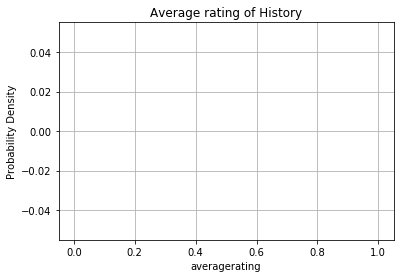

Mean average rating: nan
Median average rating: nan


In [116]:
show_distplot(History_df, 'History', 'averagerating')
print('Mean average rating: {}'.format(History_df.averagerating.mean()))
print('Median average rating: {}'.format(History_df.averagerating.median()))

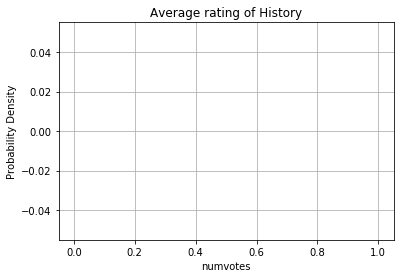

Mean average rating: nan
Median average rating: nan


In [117]:
show_distplot(History_df, 'History', 'numvotes')
print('Mean average rating: {}'.format(History_df.numvotes.mean()))
print('Median average rating: {}'.format(History_df.numvotes.median()))

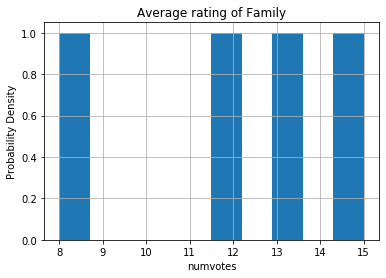

Mean average rating: 12.0
Median average rating: 12.5


In [118]:
show_distplot(Family_df, 'Family', 'numvotes')
print('Mean average rating: {}'.format(Family_df.numvotes.mean()))
print('Median average rating: {}'.format(Family_df.numvotes.median()))

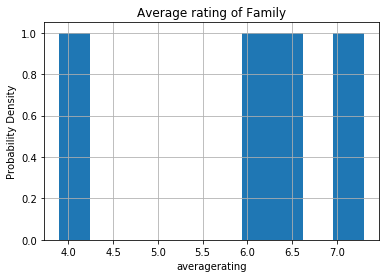

Mean average rating: 5.949999999999999
Median average rating: 6.300000000000001


In [119]:
show_distplot(Family_df, 'Family', 'averagerating')
print('Mean average rating: {}'.format(Family_df.averagerating.mean()))
print('Median average rating: {}'.format(Family_df.averagerating.median()))

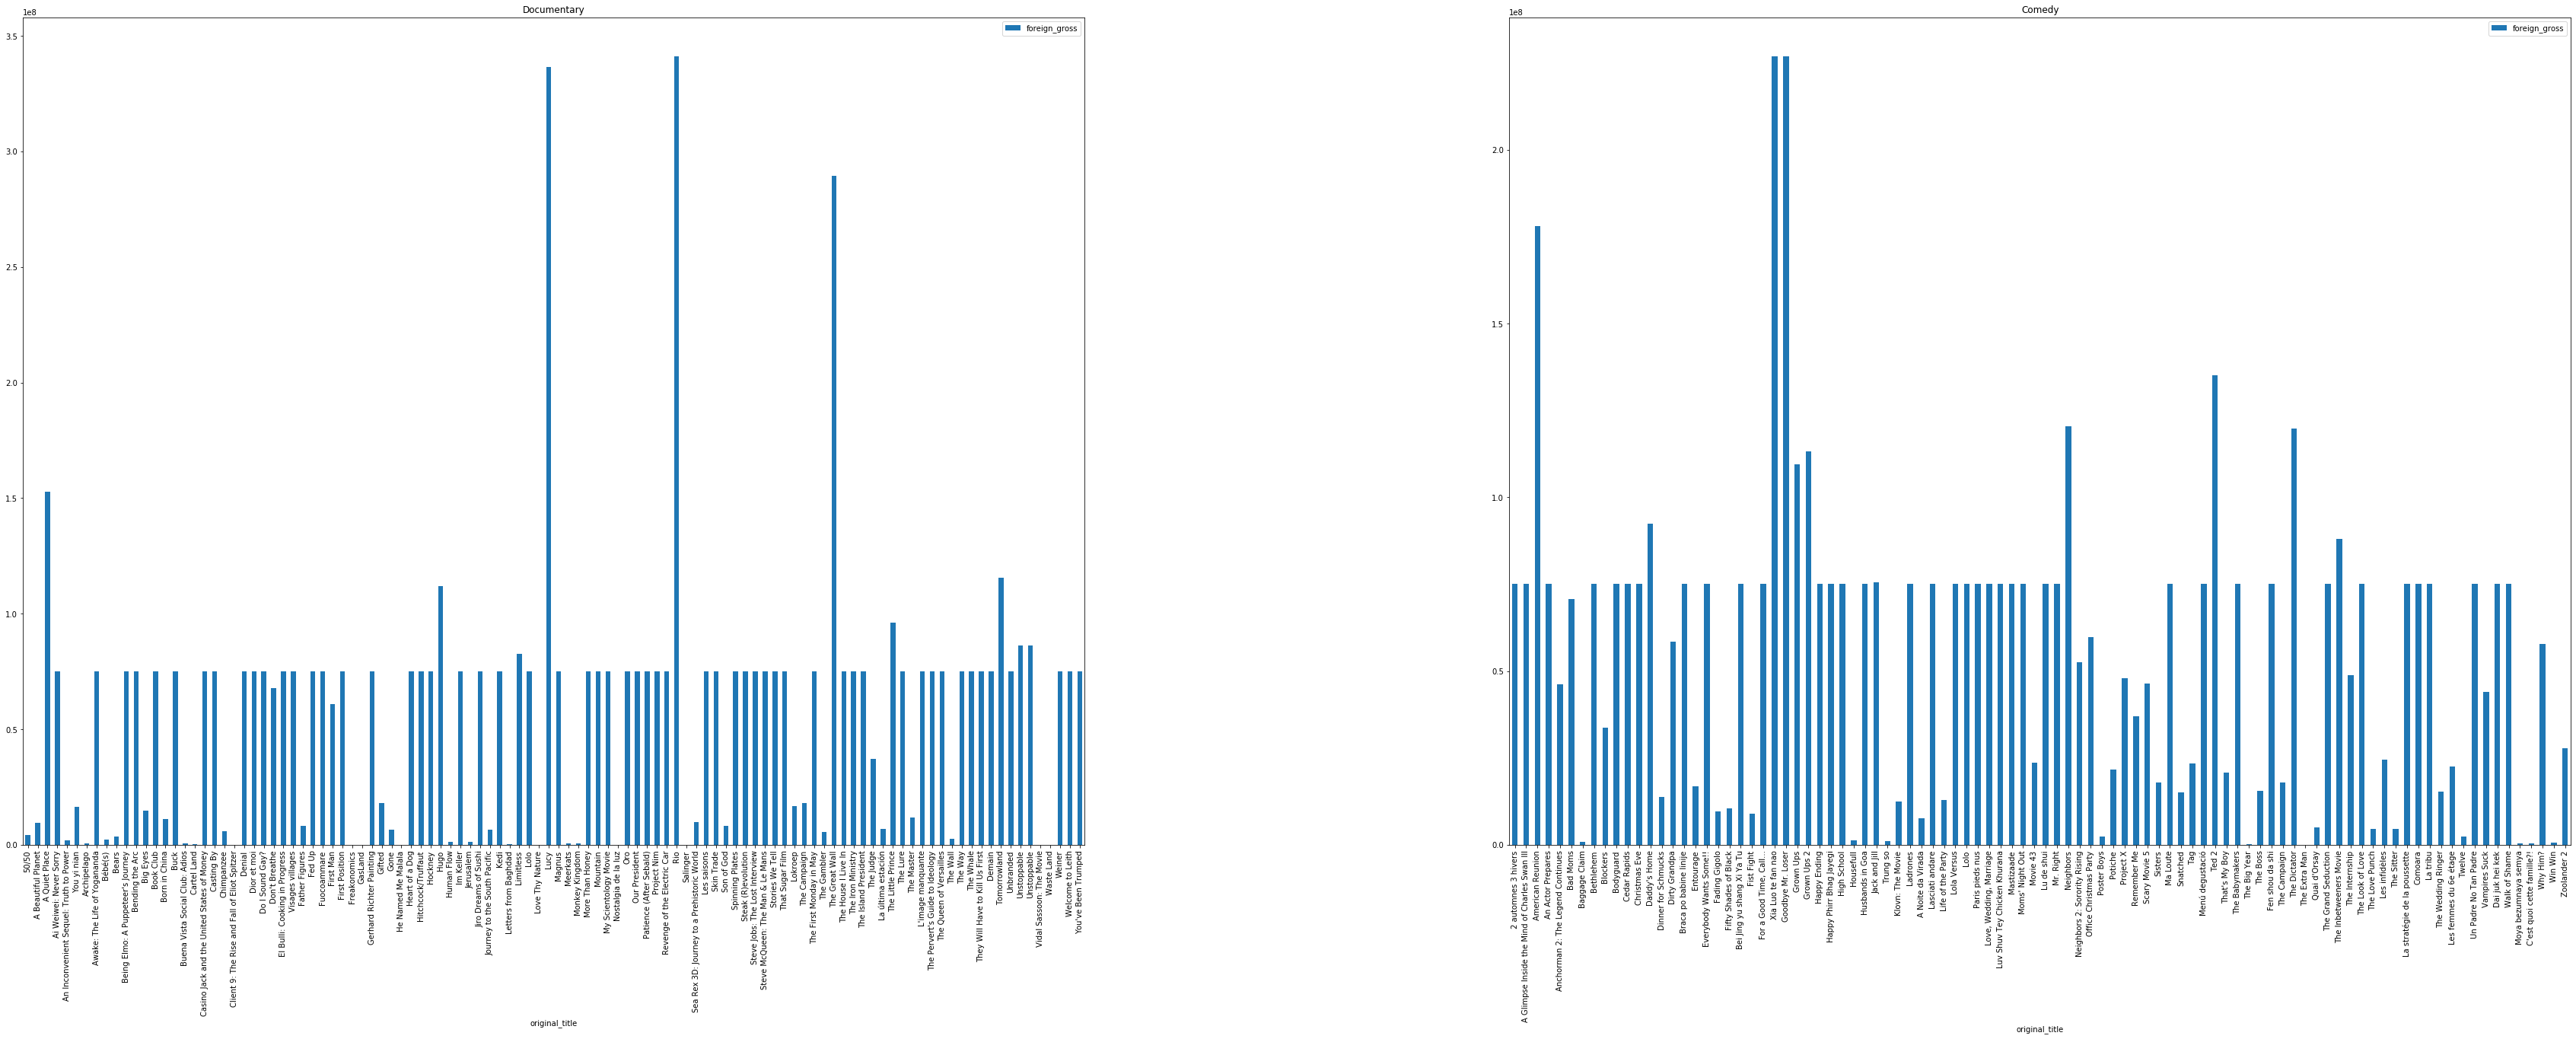

In [197]:
# Create figure
plt.figure(figsize=(60, 20))
ax1 = plt.subplot(1, 2, 1)
Documentary_df.plot.bar(x='original_title', y='foreign_gross', ax=ax1)
ax1.set_title("Documentary")

ax2 = plt.subplot(1, 2, 2)
Comedy_df.plot.bar(x='original_title', y='foreign_gross', ax=ax2)
ax2.set_title('Comedy')
plt.subplots_adjust(wspace=0.4)

In [198]:
Documentary_df.groupby(['original_title', 'foreign_gross',  'domestic_gross']).mean().head()

,,,start_year,runtime_minutes,averagerating,numvotes,year
original_title,foreign_gross,domestic_gross,,,,,
50/50,4.200000e+06,35000000.0,2010.0,77.0,7.5,11.0,2011.0
A Beautiful Planet,9.400000e+06,15500000.0,2016.0,46.0,7.4,893.0,2016.0
A Quiet Place,1.529000e+08,188000000.0,2016.0,80.0,6.6,18.0,2018.0
Ai Weiwei: Never Sorry,7.505704e+07,534000.0,2012.0,91.0,7.6,3974.0,2012.0
An Inconvenient Sequel: Truth to Power,1.900000e+06,3500000.0,2017.0,98.0,6.3,6752.0,2017.0


In [202]:
Documentary_df = df4[df4['genres'] == 'Documentary']
Drama_df = df4[df4['genres'] == 'Drama']
#Sport_df = df4[df4['genres'] == 'Sport']
Action_df = df4[df4['genres'] == 'Action'] 
Animation_df = df4[df4['genres'] == 'Animation']
Romance_df = df4[df4['genres'] == 'Romance']
#Adventure_df = df4[df4['genres'] == 'Adventure']
#Fantasy_df = df4[df4['genres'] == 'Fantasy']
#Music_df = df4[df4['genres'] == 'Music']
Crime_df = df4[df4['genres'] == 'Crime']
Comedy_df = df4[df4['genres'] == 'Comedy']
#History_df = df4[df4['genres'] == 'History']
#Family_df = df4[df4['genres'] == 'Family']
#Musical_df = df4[df4['genres'] == 'Musical']
#Sci-Fi_df = df4[df4['genres'] == 'Sci-Fi']
Horror_df = df4[df4['genres'] == 'Horror']
#Mystery_df = df4[df4['genres'] == 'Mystery']
Thriller_df = df4[df4['genres'] == 'Thriller']
df5=pd.concat([Documentary_df,Drama_df, Action_df,Animation_df, Romance_df, Crime_df, Comedy_df, Horror_df, Thriller_df])


In [203]:
df5.head()

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
title,,,,,,,,,,
50/50,50/50,2010,77.0,Documentary,7.5,11,Sum.,35000000.0,4.200000e+06,2011
A Beautiful Planet,A Beautiful Planet,2016,46.0,Documentary,7.4,893,Imax,15500000.0,9.400000e+06,2016
A Quiet Place,A Quiet Place,2016,80.0,Documentary,6.6,18,Par.,188000000.0,1.529000e+08,2018
Ai Weiwei: Never Sorry,Ai Weiwei: Never Sorry,2012,91.0,Documentary,7.6,3974,IFC,534000.0,7.505704e+07,2012
An Inconvenient Sequel: Truth to Power,An Inconvenient Sequel: Truth to Power,2017,98.0,Documentary,6.3,6752,Par.,3500000.0,1.900000e+06,2017


In [206]:
df5.groupby(['original_title', 'foreign_gross',  'domestic_gross']).max().head(10)

,,,start_year,runtime_minutes,genres,averagerating,numvotes,studio,year
original_title,foreign_gross,domestic_gross,,,,,,,
1001 Gram,7.505704e+07,11000.0,2014,93.0,Drama,6.3,1301,KL,2015
120 battements par minute,7.505704e+07,125000.0,2017,143.0,Drama,7.5,10507,Orch.,2017
17 filles,1.860000e+05,15100.0,2011,86.0,Drama,6.0,2980,Strand,2012
2 automnes 3 hivers,7.505704e+07,5800.0,2013,91.0,Comedy,6.7,582,FM,2014
2:22,7.505704e+07,400.0,2017,98.0,Thriller,5.8,16318,Magn.,2017
3 Generations,3.750000e+05,156000.0,2015,92.0,Drama,5.8,4991,Wein.,2017
50/50,4.200000e+06,35000000.0,2010,77.0,Documentary,7.5,11,Sum.,2011
99 Homes,7.505704e+07,1400000.0,2014,112.0,Drama,7.1,26699,BG,2015
A Beautiful Planet,9.400000e+06,15500000.0,2016,46.0,Documentary,7.4,893,Imax,2016


In [209]:
grouped = df5.groupby(['genres'])['domestic_gross', 
                                          'foreign_gross'].agg(['mean', 
                                                             'min', 'max', 'std'])

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [210]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, 50/50 to The Other Side
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   606 non-null    object 
 1   start_year       606 non-null    int64  
 2   runtime_minutes  606 non-null    float64
 3   genres           606 non-null    object 
 4   averagerating    606 non-null    float64
 5   numvotes         606 non-null    int64  
 6   studio           606 non-null    object 
 7   domestic_gross   606 non-null    float64
 8   foreign_gross    606 non-null    float64
 9   year             606 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 72.1+ KB


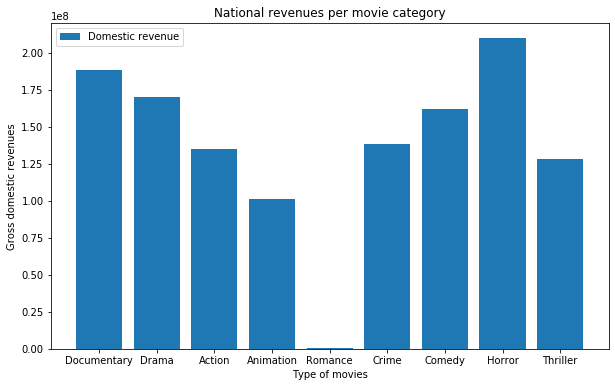

In [223]:
x=df5.loc[:, 'genres']
y=df5.loc[:, 'domestic_gross']
plt.figure(figsize=(10,6))

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y, label='Domestic revenue')

plt.xlabel('Type of movies')
plt.ylabel('Gross domestic revenues')

plt.title('National revenues per movie category')
plt.legend()

# Output the final plot
plt.show()

In [ ]:
# Create figure
#plt.figure(figsize=(20, 10))
#ax1 = plt.subplot(1, 2, 1)
#df5.plot.bar(x='genres', y='domestic_gross', ax=ax1)
#ax1.set_title("National revenue")

#ax2 = plt.subplot(1, 2, 2)
#df5.plot.bar(x='genres', y='foreign_gross', ax=ax2)
#ax2.set_title('International revenue')
#plt.subplots_adjust(wspace=0.4)

In [ ]:
x=df5.loc[:, 'genres']
y=df5.loc[:, 'domestic_gross']
plt.figure(figsize=(10,6))

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y, label='Domestic revenue')

plt.xlabel('Type of movies')
plt.ylabel('Gross domestic revenues')

plt.title('National revenues per movie category')
plt.legend()

# Output the final plot
plt.show()